In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("AccidentesAviones.csv")  # Cargamos el dataset
df.head()  # Mostramos las primeras cinco observaciones

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [72]:
# De entrada, observamos varias columnas como por ejemplo 'HORA declarada' con valores perdidos representados como "?" y posteriormente 
# al empezar el EDA observé que también el "-" estaba como valor faltante, procediendo a identificarlos como tal.
na_values = ["?", "-"]   # Reemplazamos estos valores perdidos "?" y "-" por el valor NaN
df = pd.read_csv("AccidentesAviones.csv", na_values=na_values)  # Cargamos de nuevo el dataset pero reemplazando "?" y "-" por NaN
# Mostramos las primeras cinco observaciones para asegurarnos que los valores con "?" y "-" han sido reemplazados por NaN

In [73]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)  # Eliminamos la columna 'Unnamed: 0'

In [74]:
df.info()  # Mostramos la información sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   5008 non-null   object 
 1   HORA declarada          3504 non-null   object 
 2   Ruta                    5003 non-null   object 
 3   OperadOR                4998 non-null   object 
 4   flight_no               1290 non-null   object 
 5   route                   4246 non-null   object 
 6   ac_type                 4995 non-null   object 
 7   registration            4736 non-null   object 
 8   cn_ln                   4341 non-null   object 
 9   all_aboard              4991 non-null   float64
 10  PASAJEROS A BORDO       4787 non-null   float64
 11  crew_aboard             4789 non-null   float64
 12  cantidad de fallecidos  5000 non-null   float64
 13  passenger_fatalities    4773 non-null   float64
 14  crew_fatalities         4773 non-null   

In [75]:
# Renombramos algunas columnas del DataFrame
df = df.rename(columns={'fecha':'date', 'HORA declarada':'time', 'Ruta':'accident_place', 'OperadOR':'operator', 'PASAJEROS A BORDO':'passengers_aboard', 'cantidad de fallecidos':'fatalities'})

In [76]:
df.columns  # Mostramos los nombres de las columnas del DataFrame para asegurarnos que los nombres has sido reemplazados

Index(['date', 'time', 'accident_place', 'operator', 'flight_no', 'route',
       'ac_type', 'registration', 'cn_ln', 'all_aboard', 'passengers_aboard',
       'crew_aboard', 'fatalities', 'passenger_fatalities', 'crew_fatalities',
       'ground', 'summary'],
      dtype='object')

In [77]:
df.isnull().sum()  # Identificamos el número de missing values en cada columna del DataFrame

date                       0
time                    1504
accident_place             5
operator                  10
flight_no               3718
route                    762
ac_type                   13
registration             272
cn_ln                    667
all_aboard                17
passengers_aboard        221
crew_aboard              219
fatalities                 8
passenger_fatalities     235
crew_fatalities          235
ground                    44
summary                   59
dtype: int64

A partir de este resumen, podemos ver que solamente la columna 'date' no tiene valores faltantes. Todas las demás tienen un número variable de valores faltantes.

In [78]:
import missingno as msno  # Biblioteca para visualizar los datos que faltan en el DataFrame

<Axes: >

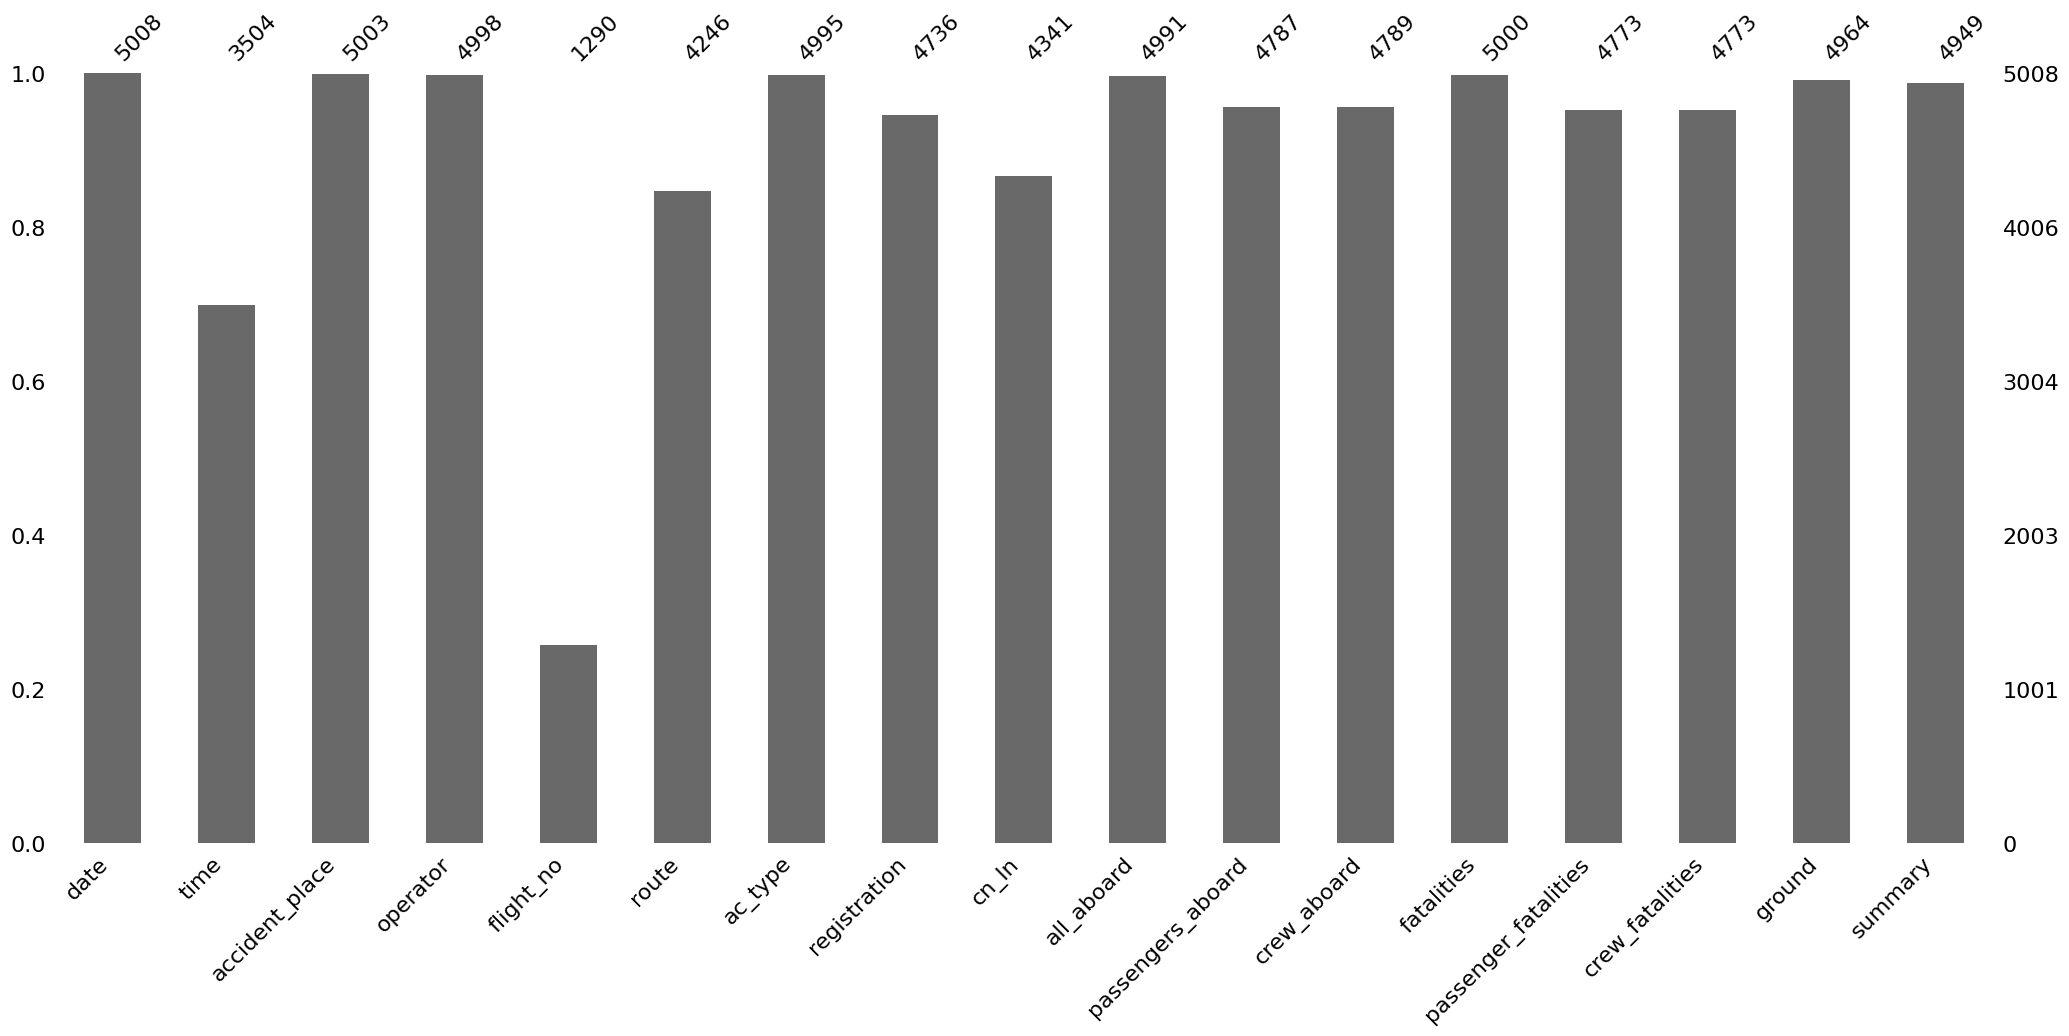

In [79]:
msno.bar(df)

Al visualizar el diagrama de barras de los valores faltantes podemos ver que las columnas 'time' y 'flight_no' tienen una gran cantidad de valores faltantes. Otras columnas como 'route' y 'cn_ln' tienen un número moderado de valores faltantes, mientras las columnas 'accident_place', 'operator', 'ac_type', 'registration', 'all_aboard', 'passengers_aboard', 'crew_aboard', 'fatalities', 'passenger_fatalities', 'crew_fatalities', 'ground' y 'summary' tienen una cantidad pequeña de valores faltantes. Solamente la columna 'date' está completa, es decir tiene el número máximo de valores no nulos.

<Axes: >

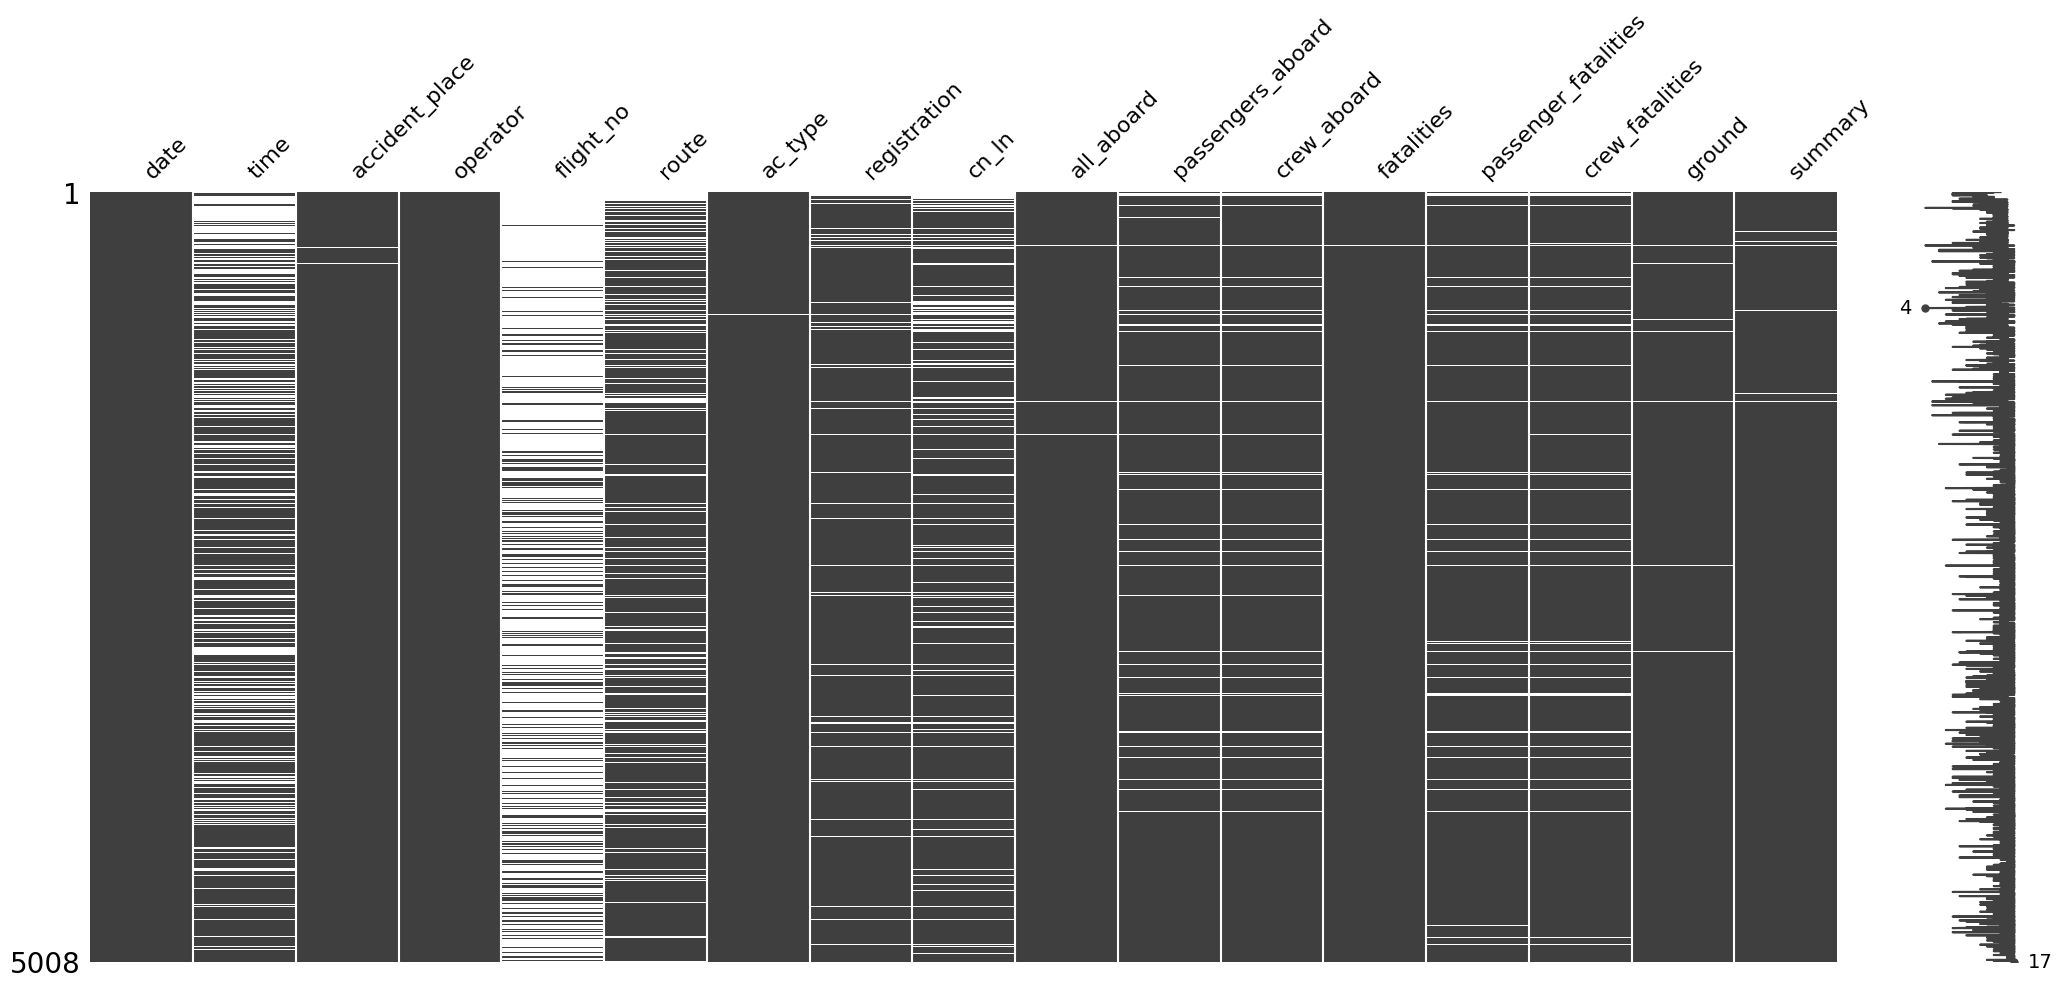

In [80]:
msno.matrix(df)

Como se ve en el gráfico matricial, las columnas 'time' y 'flight_no' muestran grandes porciones de datos faltantes (franjas blancas). Esto se identificó en el diagrama de barras, pero el beneficio adicional es que aquí se puede ver cómo se distribuyen los datos faltantes a lo largo del DataFrame.

<Axes: >

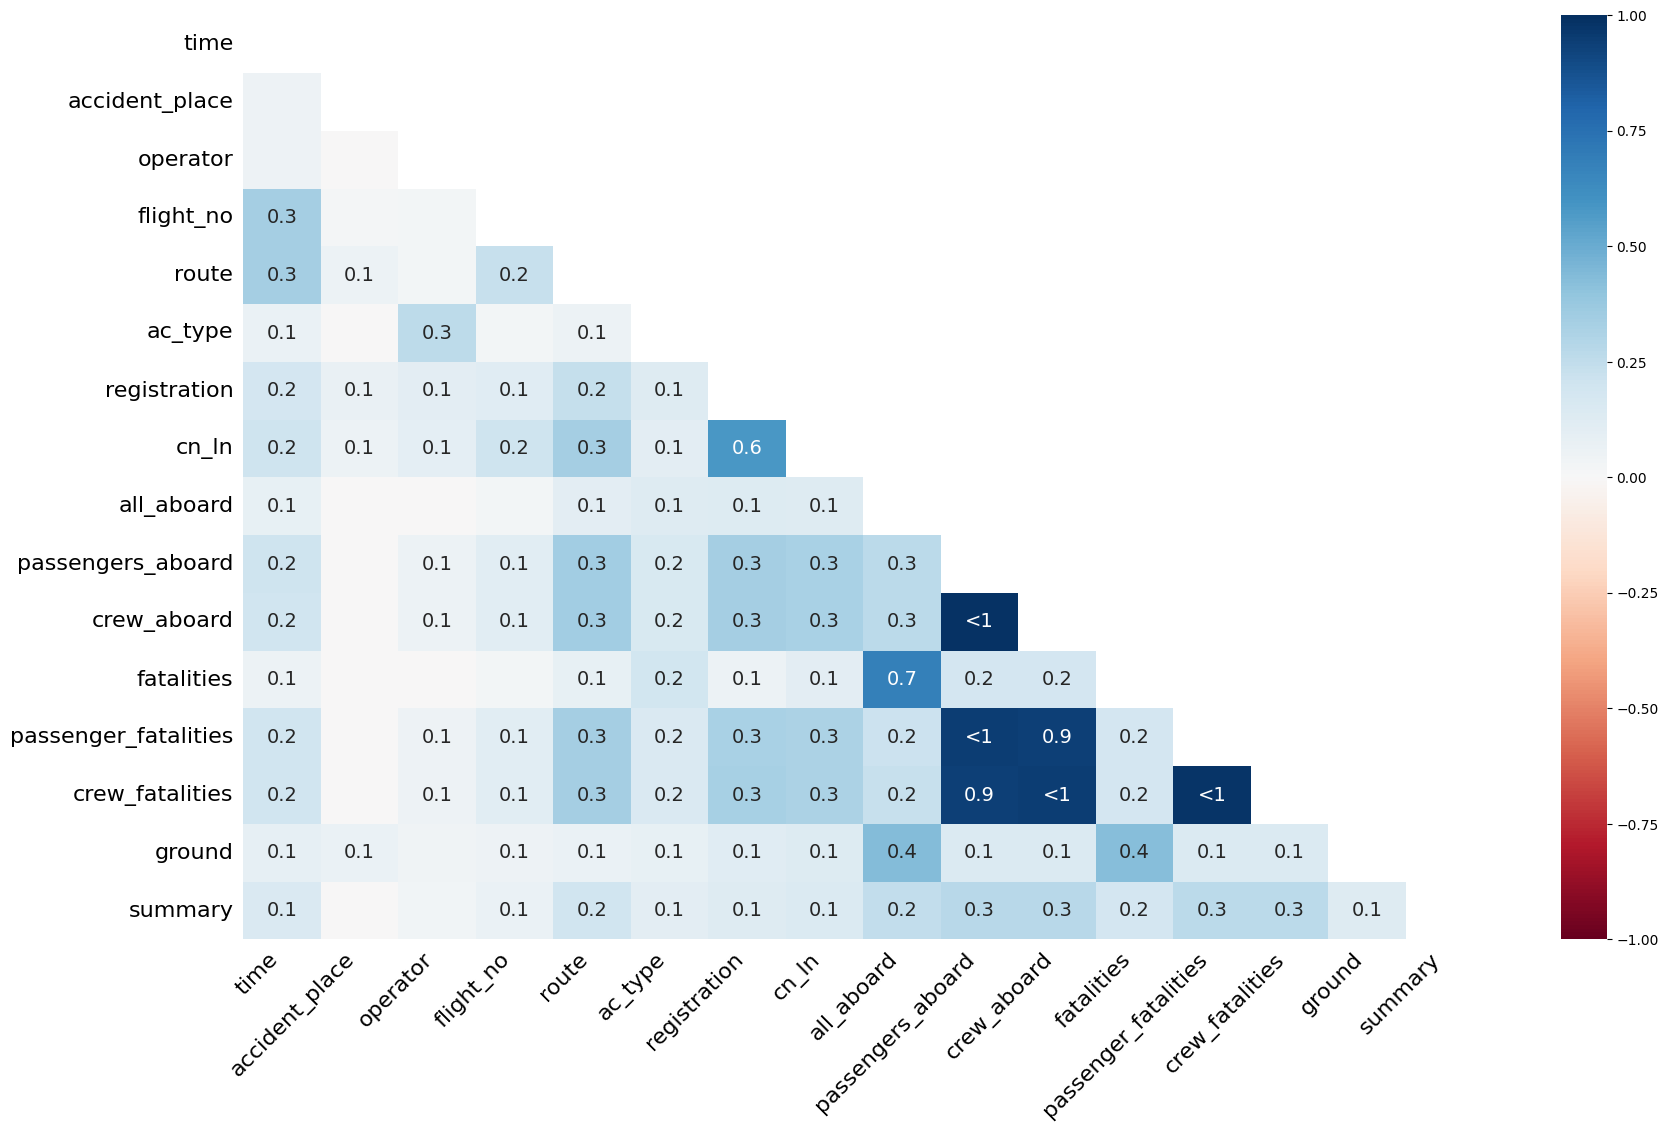

In [81]:
msno.heatmap(df)

Aquí podemos ver que la ausencia de valores en la columna 'passenger_fatalities' está altamente correlacionada con la ausencia de valores en las columnas 'passengers_aboard' y 'crew_aboard', además de 'crew_fatalities'. Si echamos un vistazo a 'crew_fatalities', su ausencia está también altamente correlacionada con los valores faltantes en las columnas passengers_aboard' y 'crew_aboard', además de 'passenger_fatalities'.

<Axes: >

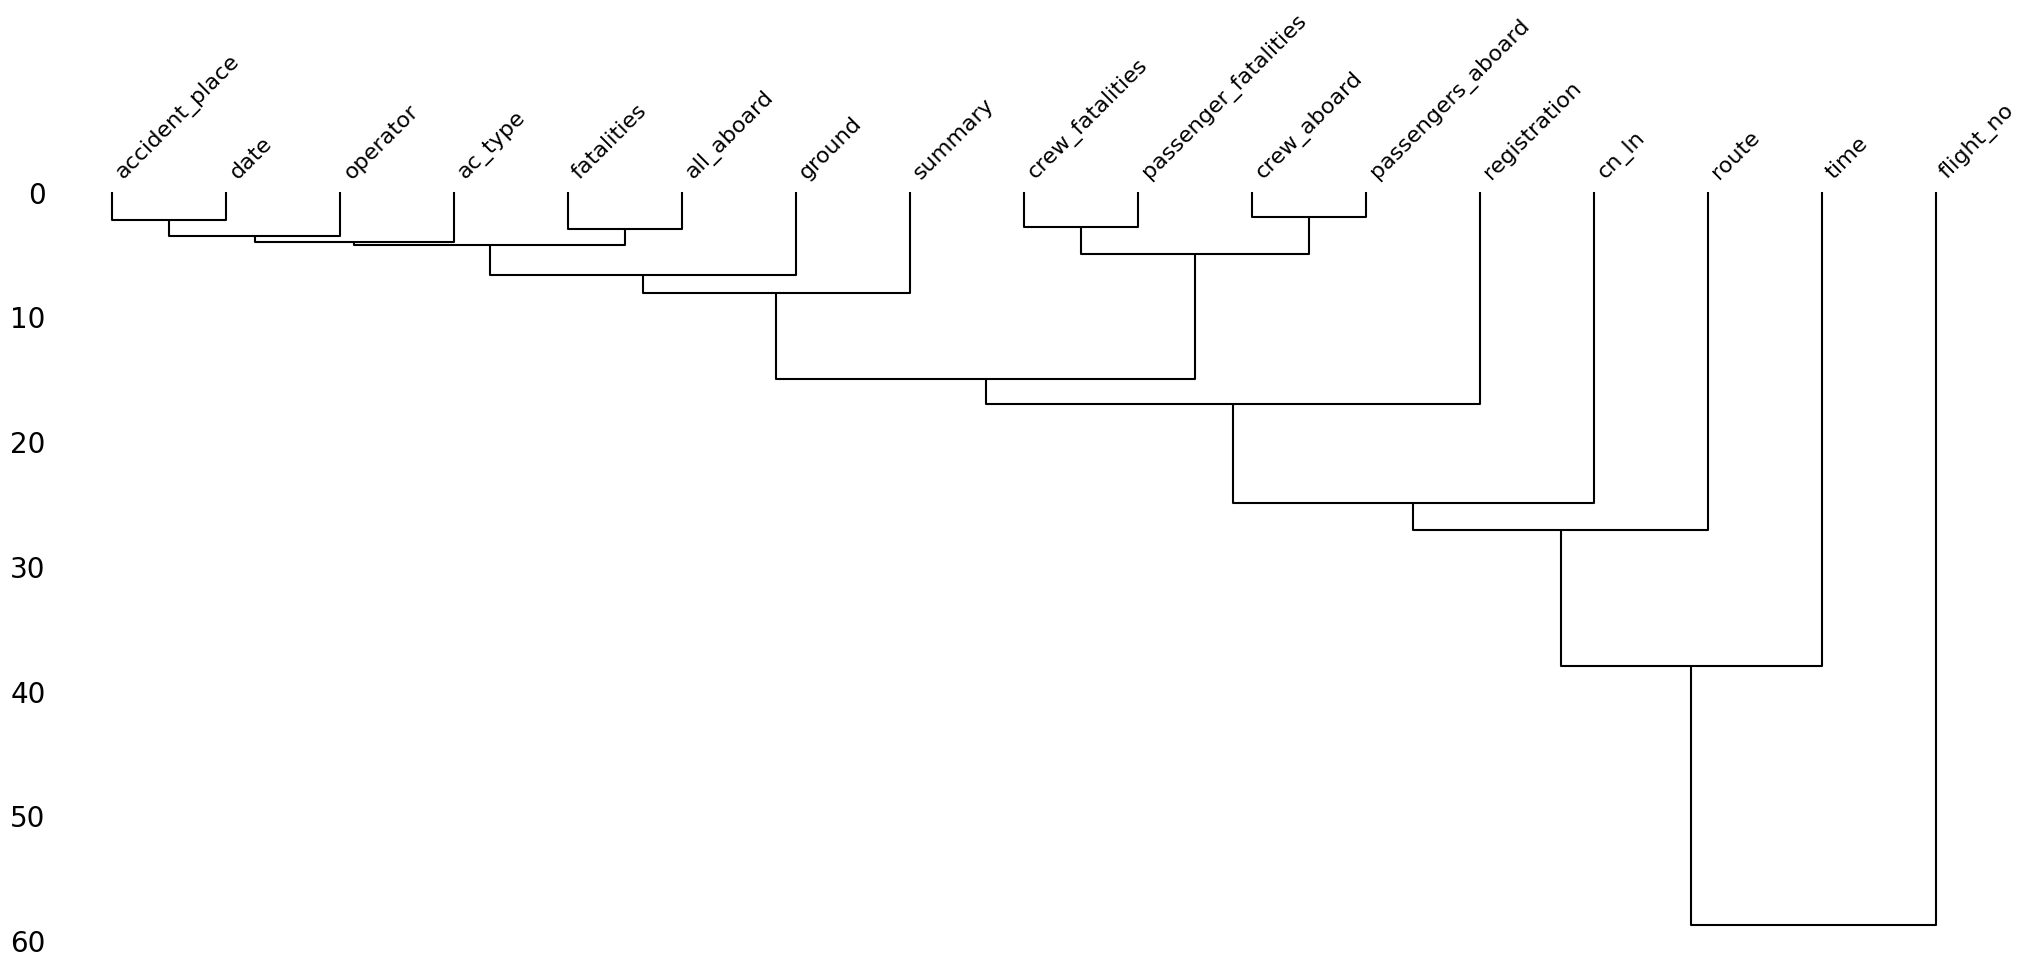

In [82]:
msno.dendrogram(df)

Aquí observamos nuevamente que la ausencia de valores en las columnas 'crew_fatalities' y 'passenger_fatalities' está relacionada con la ausencia de valores en las columnas 'passengers_aboard' y 'crew_aboard'.

Ahora que sabemos lo que ocurre con los valores perdidos que hay en las variables, es hora de ocuparnos de ellos mediante su eliminación o imputación.

In [83]:
df['time'].fillna('00:00', inplace = True)  # Imputamos los valores faltantes de la columna 'time' con "00:00"
df['accident_place'].fillna('No accident_place', inplace = True)  # Imputaremos los valores faltantes de la columna 'accident_place' con 'No accident_place'
df['operator'].fillna('No operator', inplace = True)  # Imputaremos los valores faltantes de la columna 'operator' con 'No operator'
df['flight_no'].fillna('No flight_no', inplace = True)  # Imputaremos los valores faltantes de la columna 'flight_no' con 'No flight_no'
df['route'].fillna('No route', inplace = True)  # Imputaremos los valores faltantes de la columna 'route' 'No route'
df['ac_type'].fillna('No ac_type', inplace = True)  # Imputaremos los valores faltantes de la columna 'ac_type' 'No ac_type'
df['registration'].fillna('No registration', inplace = True)  # Imputaremos los valores faltantes de la columna 'registration' 'No registration'
df['cn_ln'].fillna('No cn_ln', inplace = True)  # Imputaremos los valores faltantes de la columna 'cn_ln' 'No cn_ln'
df['summary'].fillna('No summary', inplace = True)  # Imputaremos los valores faltantes de la columna 'summary' 'No summary'

In [84]:
# Eliminamos del DataFrame las filas con valores faltantes en las columnas 'all_aboard' y 'fatalities' solamente
df.dropna(subset=['all_aboard', 'fatalities'], inplace=True)

En las otras 5 columnas numéricas restantes como son: 'passengers_aboard', 'crew_aboard', 'passenger_fatalities', 'crew_fatalities' y 'ground' por ahora no imputaré sus valores ni eliminaré del DataFrame las filas correspondientes, para no perder información relevante.

In [85]:
import locale  # Importamos la librería locale para establecer la configuración regional del idioma (español)
locale.setlocale(locale.LC_TIME,'es_ES')  # establecemos la configuración para los meses y los días en español

'es_ES'

In [86]:
df['date'] = pd.to_datetime(df['date'])  # Convierte un objeto escalar en un objeto de fecha y hora de pandas
df['date']

0      1908-09-17
1      1909-09-07
2      1912-07-12
3      1913-08-06
4      1913-09-09
          ...    
5003   2021-03-28
5004   2021-05-21
5005   2021-06-10
5006   2021-07-04
5007   2021-07-06
Name: date, Length: 4991, dtype: datetime64[ns]

In [87]:
df['year'] = df['date'].dt.strftime("%Y")  # Convierte a índice utilizando el formato de fecha especificado
df['year']

0       1908
1       1909
2       1912
3       1913
4       1913
        ... 
5003    2021
5004    2021
5005    2021
5006    2021
5007    2021
Name: year, Length: 4991, dtype: object

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  4991 non-null   datetime64[ns]
 1   time                  4991 non-null   object        
 2   accident_place        4991 non-null   object        
 3   operator              4991 non-null   object        
 4   flight_no             4991 non-null   object        
 5   route                 4991 non-null   object        
 6   ac_type               4991 non-null   object        
 7   registration          4991 non-null   object        
 8   cn_ln                 4991 non-null   object        
 9   all_aboard            4991 non-null   float64       
 10  passengers_aboard     4787 non-null   float64       
 11  crew_aboard           4789 non-null   float64       
 12  fatalities            4991 non-null   float64       
 13  passenger_fataliti

Ahora iniciamos el Análisis exploratorio de datos, EDA. Con los gráficos y tablas siguientes se observa que todas las variables cuantitativas tienen una distribución asimétrica positiva y que presentan valores atípicos.

In [89]:
df.describe()

,all_aboard,passengers_aboard,crew_aboard,fatalities,passenger_fatalities,crew_fatalities,ground
count,4991.000000,4787.000000,4789.000000,4991.000000,4770.000000,4771.000000,4959.000000
mean,31.121218,26.877376,4.519524,22.319575,18.951782,3.588556,1.718088
std,45.479965,44.035342,3.758072,35.025119,34.073037,3.177335,55.523374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8664\2169863630.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['all_aboard'], hist=True)


count    4991.000000
mean       31.121218
std        45.479965
min         0.000000
25%         7.000000
50%        16.000000
75%        35.000000
max       644.000000
Name: all_aboard, dtype: float64

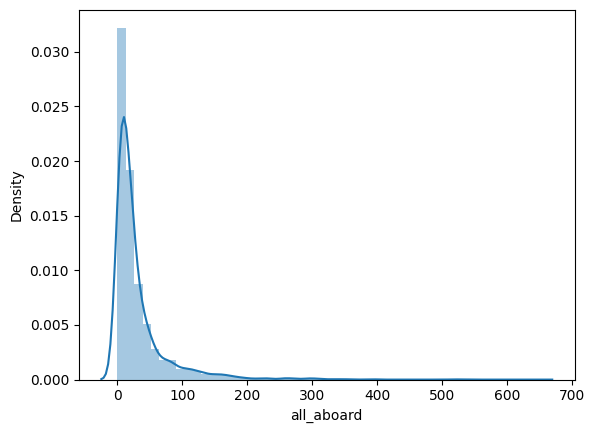

In [90]:
sns.distplot(df['all_aboard'], hist=True)
df['all_aboard'].describe()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8664\554406888.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['passengers_aboard'], hist=True)


count    4787.000000
mean       26.877376
std        44.035342
min         0.000000
25%         3.000000
50%        12.000000
75%        30.000000
max       614.000000
Name: passengers_aboard, dtype: float64

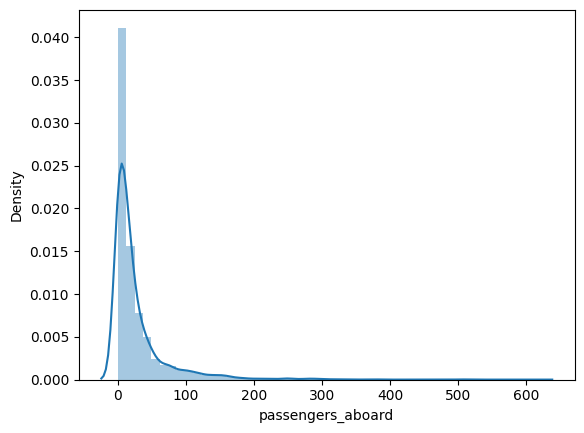

In [91]:
sns.distplot(df['passengers_aboard'], hist=True)
df['passengers_aboard'].describe()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8664\2781435591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['crew_aboard'], hist=True)


count    4789.000000
mean        4.519524
std         3.758072
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        83.000000
Name: crew_aboard, dtype: float64

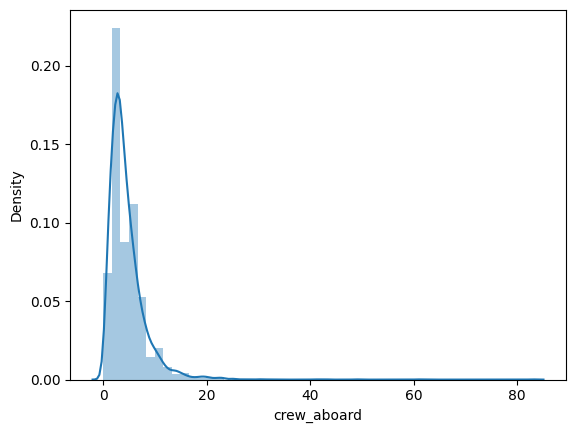

In [92]:
sns.distplot(df['crew_aboard'], hist=True)
df['crew_aboard'].describe()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8664\2811267874.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fatalities'], hist=True)


count    4991.000000
mean       22.319575
std        35.025119
min         0.000000
25%         4.000000
50%        11.000000
75%        25.000000
max       583.000000
Name: fatalities, dtype: float64

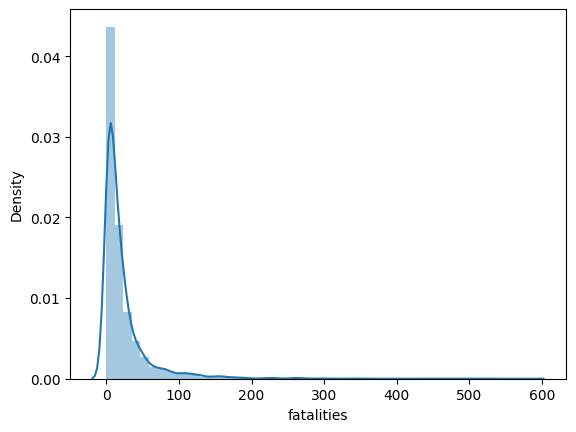

In [93]:
sns.distplot(df['fatalities'], hist=True)
df['fatalities'].describe()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8664\2782069676.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['passenger_fatalities'], hist=True)


count    4770.000000
mean       18.951782
std        34.073037
min         0.000000
25%         1.000000
50%         8.000000
75%        21.000000
max       560.000000
Name: passenger_fatalities, dtype: float64

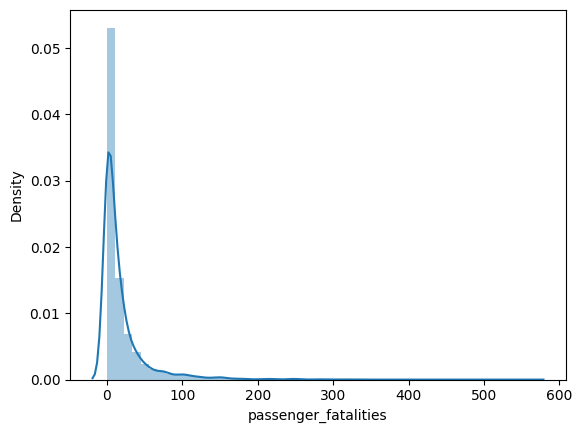

In [94]:
sns.distplot(df['passenger_fatalities'], hist=True)
df['passenger_fatalities'].describe()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8664\3199493998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['crew_fatalities'], hist=True)


count    4771.000000
mean        3.588556
std         3.177335
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        43.000000
Name: crew_fatalities, dtype: float64

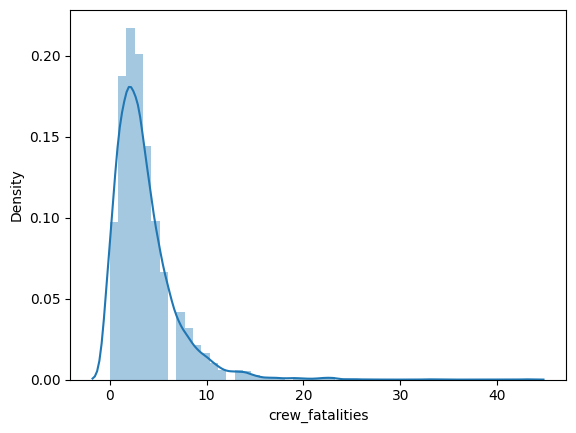

In [95]:
sns.distplot(df['crew_fatalities'], hist=True)
df['crew_fatalities'].describe()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8664\3158226389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ground'], hist=True)


count    4959.000000
mean        1.718088
std        55.523374
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2750.000000
Name: ground, dtype: float64

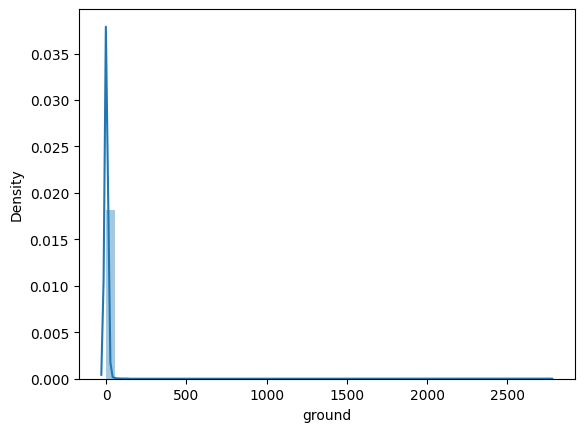

In [96]:
sns.distplot(df['ground'], hist=True)
df['ground'].describe()

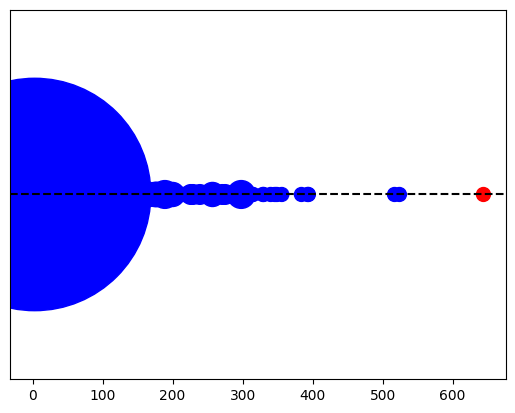

In [97]:
import matplotlib.pyplot as plt
 
all_aboard_unique, counts = np.unique(df['all_aboard'], return_counts=True)
 
sizes = counts*100
colors = ['blue']*len(all_aboard_unique)
colors[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(all_aboard_unique, np.ones(len(all_aboard_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x26209261b90>,
 'caps': [<matplotlib.lines.Line2D at 0x26209263390>,
 'boxes': [<matplotlib.lines.Line2D at 0x26209263bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2620928c950>],
 'fliers': [<matplotlib.lines.Line2D at 0x2620928edd0>],
 'means': []}

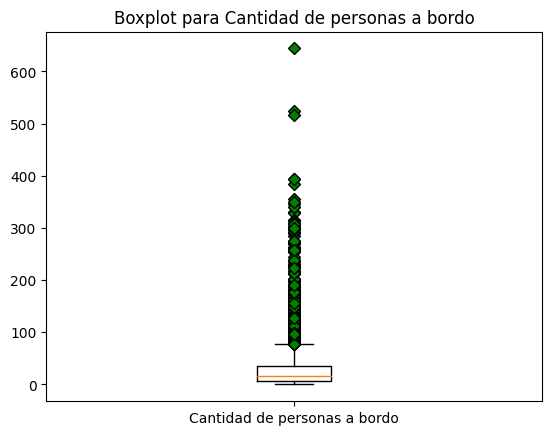

In [98]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot para Cantidad de personas a bordo')
ax.boxplot(df['all_aboard'], flierprops=green_diamond, labels=["Cantidad de personas a bordo"])

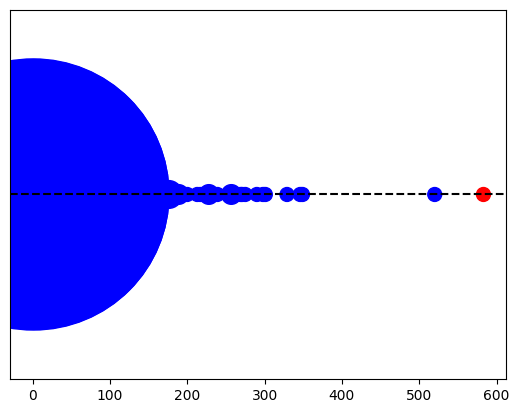

In [99]:
fatalities_unique, counts = np.unique(df['fatalities'], return_counts=True)
 
sizes = counts*100
colors = ['blue']*len(fatalities_unique)
colors[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(fatalities_unique, np.ones(len(fatalities_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x26208fd6a50>,
 'caps': [<matplotlib.lines.Line2D at 0x2620919fa50>,
 'boxes': [<matplotlib.lines.Line2D at 0x26208f58dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2620929f750>],
 'fliers': [<matplotlib.lines.Line2D at 0x2620929fc50>],
 'means': []}

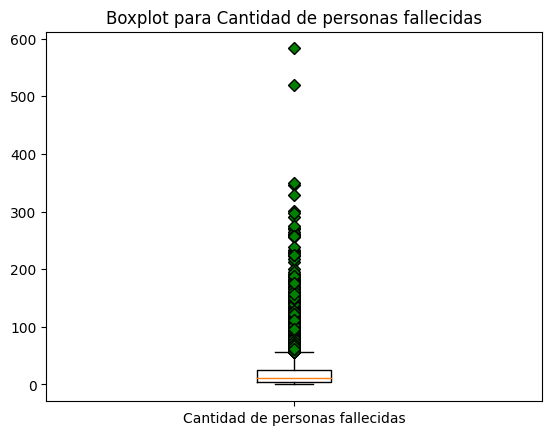

In [100]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot para Cantidad de personas fallecidas')
ax.boxplot(df['fatalities'], flierprops=green_diamond, labels=["Cantidad de personas fallecidas"])

In [101]:
df[['all_aboard', 'passengers_aboard', 'crew_aboard', 'fatalities', 'passenger_fatalities', 'crew_fatalities', 'ground']]

,all_aboard,passengers_aboard,crew_aboard,fatalities,passenger_fatalities,crew_fatalities,ground
0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,20.0,NaN,NaN,14.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...
5003,6.0,5.0,1.0,5.0,4.0,1.0,0.0
5004,11.0,7.0,4.0,11.0,7.0,4.0,0.0
5005,14.0,12.0,2.0,12.0,11.0,1.0,0.0
5006,96.0,88.0,8.0,50.0,NaN,NaN,3.0


Como se observa en esta tabla, los valores de la columna 'all_aboard' son el resultado de sumar las columnas 'passengers_aboard' y 'crew_aboard'; igual ocurre con la columna 'fatalities' que es el resultado de sumar las columnas 'passengers_fatalities' y 'crew_fatalities'. En consecuencia, de estas seis columnas, se considerará para el análisis solamente las columnas 'all_aboard' y 'fatalities'. Además, porque en estas dos columnas faltaban menos valores, los cuales ya se eliminaron del DataFrame.

In [102]:
df[['all_aboard', 'passengers_aboard', 'crew_aboard', 'fatalities', 'passenger_fatalities', 'crew_fatalities', 'ground']].corr()

,all_aboard,passengers_aboard,crew_aboard,fatalities,passenger_fatalities,crew_fatalities,ground
all_aboard,1.000000,0.997487,0.568893,0.739646,0.746712,0.320119,0.020327
passengers_aboard,0.997487,1.000000,0.510741,0.738965,0.747417,0.274408,0.018833
crew_aboard,0.568893,0.510741,1.000000,0.441561,0.395682,0.720937,0.032121
fatalities,0.739646,0.738965,0.441561,1.000000,0.992972,0.572386,0.032410
passenger_fatalities,0.746712,0.747417,0.395682,0.992972,1.000000,0.507185,0.030132
crew_fatalities,0.320119,0.274408,0.720937,0.572386,0.507185,1.000000,0.043905
ground,0.020327,0.018833,0.032121,0.032410,0.030132,0.043905,1.000000


En esta tabla de correlación, observamos que existe una correlación muy alta entre los valores de las columnas 'all_aboard' y 'passengers_aboard' 0.997487; lo que apoya la decisión de descartar 'passengers_aboards' del análisis de datos de los accidentes aéreos del dataset dado, por ser una variable redundante y tener más valores faltantes que 'all_aboard', perdiéndose menos información en el DataFrame al eliminar los registros con valores faltantes. Igual ocurre con las columnas 'fatalities' y 'passenger_fatalities', cuya correlación es de 0.992972. Así, para el análisis, de estas cuatro variables se consideran 'all_aboard' y 'fatalities'

In [103]:
total_accidentes = len(df)  # Calcula el número total de accidentes
print('Número total de accidentes: ', total_accidentes)

Número total de accidentes:  4991


In [104]:
accidentes_por_year = df['year'].value_counts().sort_values(ascending=False).head(20)  # Calcula el número de accidentes por año
print('Accidentes por año: ')
print(accidentes_por_year)

Accidentes por año: 
1946    87
1989    82
1947    82
1948    78
1962    78
1972    77
1945    75
1951    74
1994    74
1970    73
1950    71
1960    70
1953    69
1969    69
1991    69
1958    68
1996    68
1949    67
1959    66
1992    65
Name: year, dtype: int64


In [105]:
accidentes_por_year = df['year'].value_counts().sort_index()  # Calcula el número de accidentes aéreos por año
print('Accidentes por año: ')
print(accidentes_por_year)

Accidentes por año: 
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2017    15
2018    19
2019    13
2020     8
2021     7
Name: year, Length: 111, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

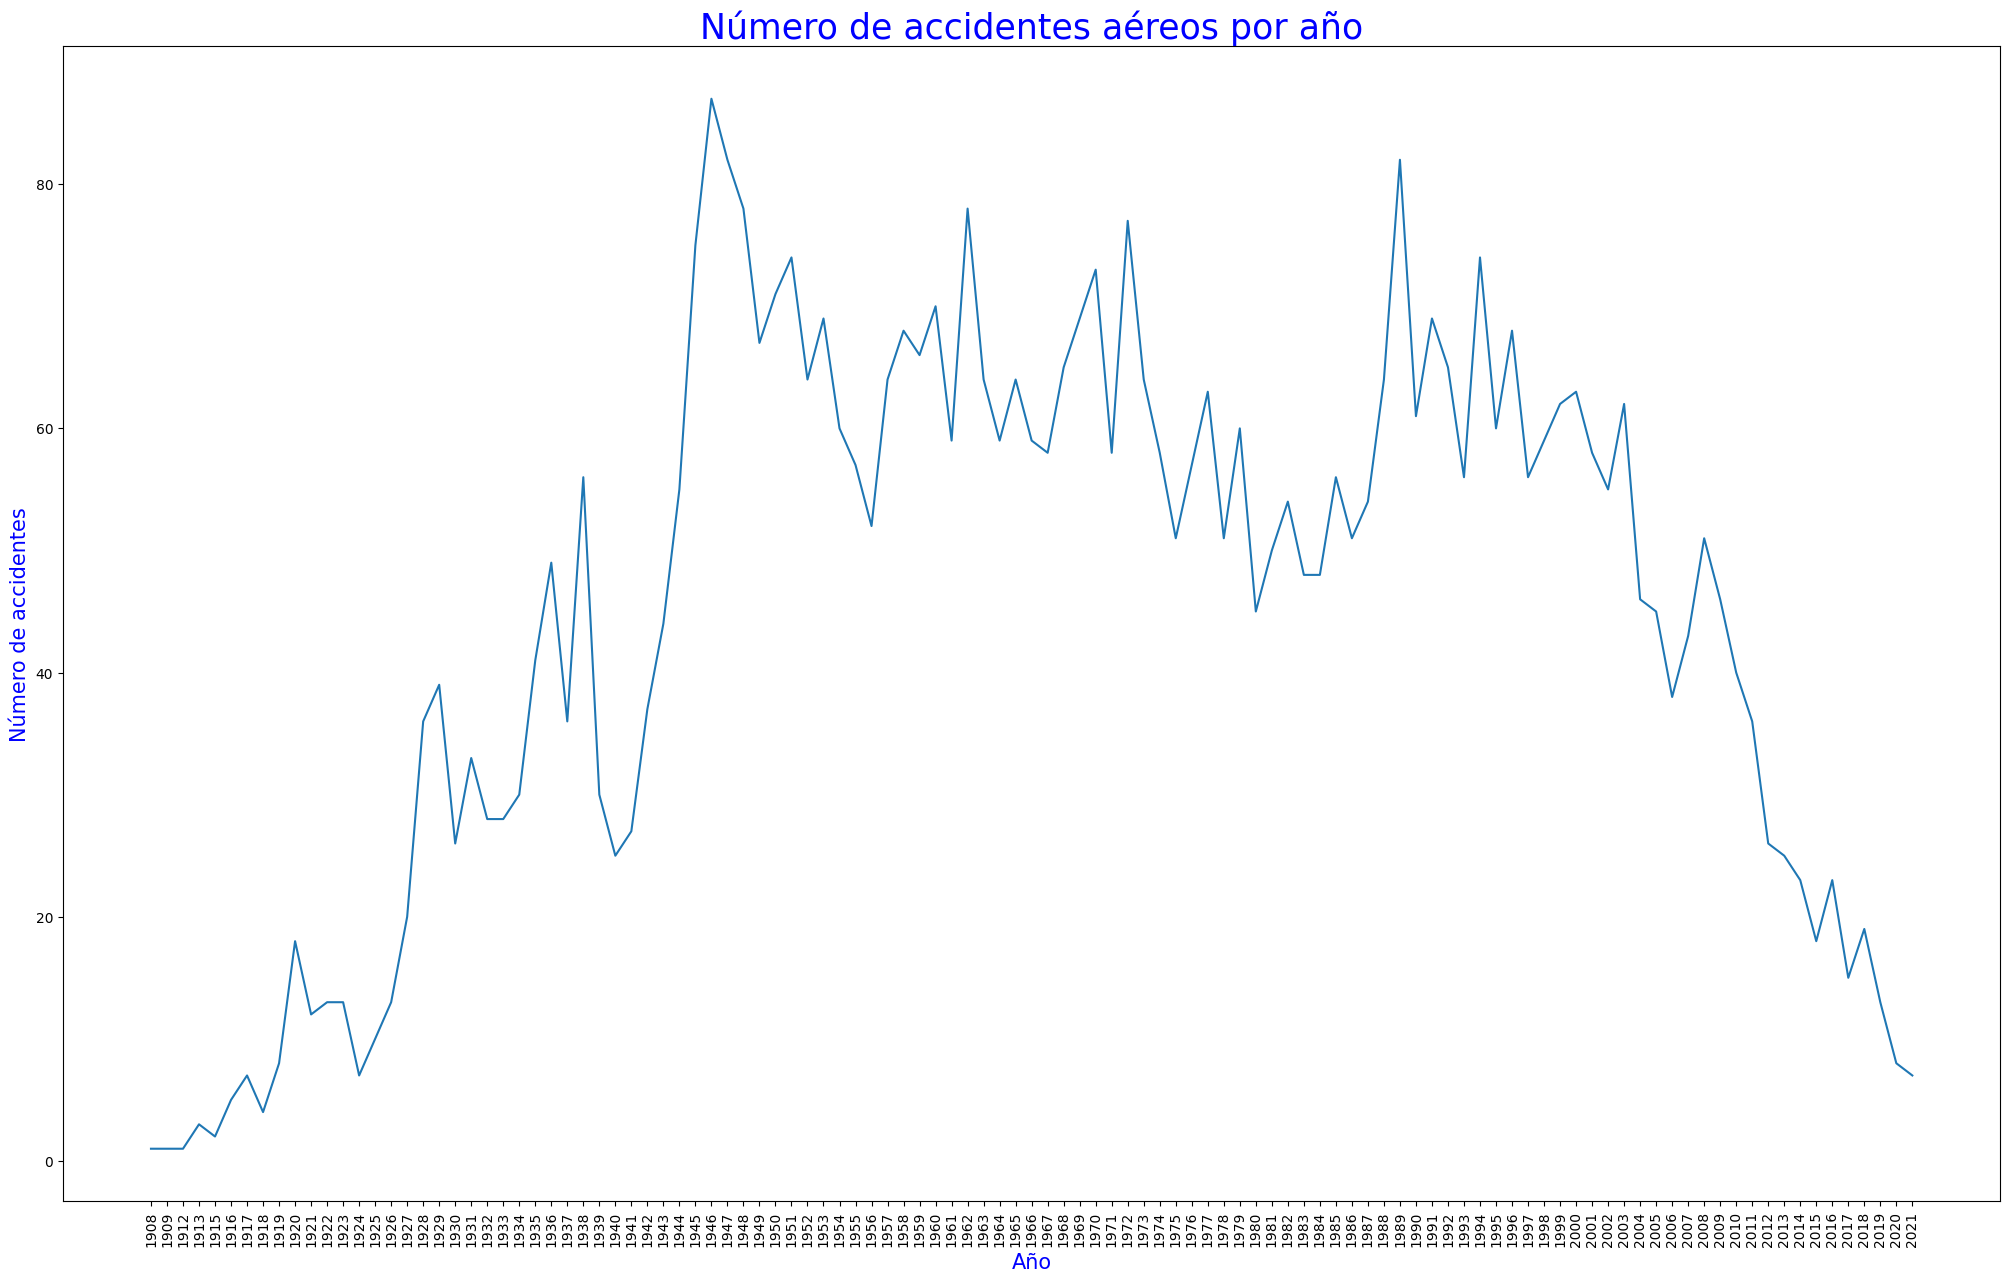

In [106]:
plt.figure(figsize=(25,15))
sns.lineplot(accidentes_por_year)  # Diagrama de líneas
plt.xticks(rotation='vertical')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('Número de accidentes', fontsize=15, color='blue')
plt.title('Número de accidentes aéreos por año', fontsize=25, color='blue')
plt.show

Aquí observamos que el número de accidentes aéreos tiene una tendencia creciente hasta 1946, tendiendo a mantenerse entre estos valores hasta 1989, para continuar con una tendencia decreciente hasta el 2021. Esto nos indica que la seguridad aerea ha venido mejorando en estos últimos años.

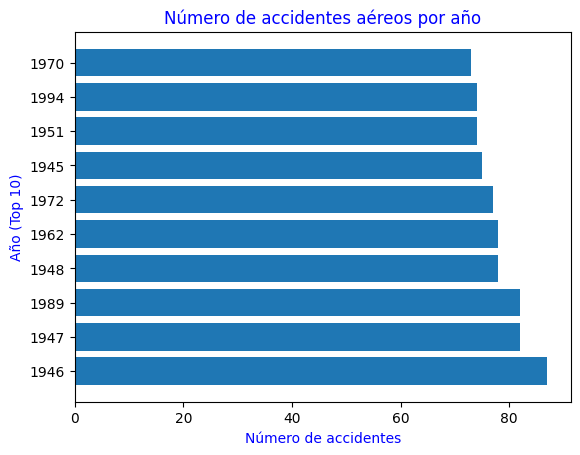

In [107]:
top_10_categorias = accidentes_por_year.sort_values(ascending=False).head(10)  # Selecciona las 10 categorías principales
plt.barh(top_10_categorias.index, top_10_categorias.values)  # Diagrama de barras
plt.xlabel('Número de accidentes', color='blue')
plt.ylabel('Año (Top 10)', color='blue')
plt.title('Número de accidentes aéreos por año', color='blue')
plt.show()

En este diagrama de barras observamos los 10 años que presentaron mayor cantidad de accidentes aéreos, correspondiéndose con la información mostrada en la gráfica anterior.

In [108]:
accidentes_por_ac_type = df['ac_type'].value_counts().sort_values(ascending=False).head(10)  # Calcula el número de accidentes por tipo de aeronave
print('Accidentes por tipo de aeronave: ')
print(accidentes_por_ac_type)

Accidentes por tipo de aeronave: 
Douglas DC-3                                330
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 63
Douglas DC-4                                 41
Antonov AN-26                                35
Yakovlev YAK-40                              35
Junkers JU-52/3m                             30
Douglas DC-6B                                27
De Havilland DH-4                            27
Name: ac_type, dtype: int64


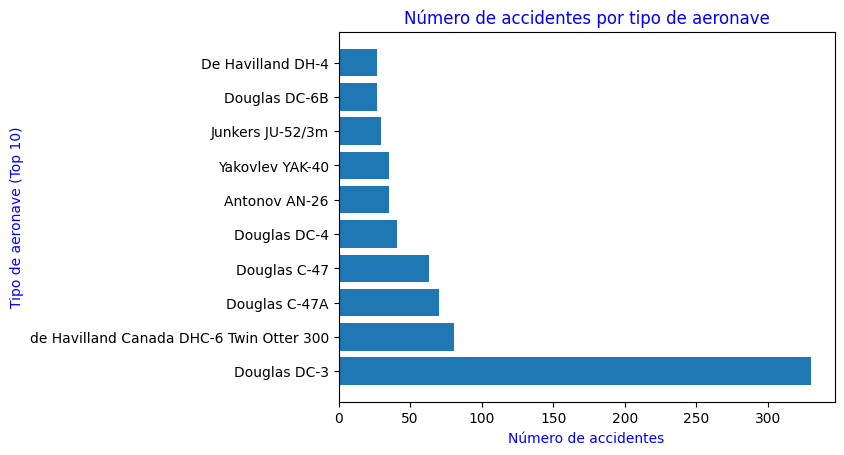

In [109]:
top_10_categorias = accidentes_por_ac_type.sort_values(ascending=False).head(10)  # Selecciona las 10 categorías principales
plt.barh(top_10_categorias.index, top_10_categorias.values)  # Diagrama de barras
plt.xlabel('Número de accidentes', color='blue')
plt.ylabel('Tipo de aeronave (Top 10)', color='blue')
plt.title('Número de accidentes por tipo de aeronave', color='blue')
plt.show()

En esta gráfica observamos que la aeronave 'Douglas DC-3, presentó considerablemente mas accidentes que las demás.

In [110]:
accidentes_por_operator = df['operator'].value_counts().sort_values(ascending=False).head(10)  # Calcula el número de accidentes por operador
print('Accidentes por tipo de operador: ')
print(accidentes_por_operator)

Accidentes por tipo de operador: 
Aeroflot                               253
Military - U.S. Air Force              141
Air France                              73
Deutsche Lufthansa                      63
United Air Lines                        44
Military - U.S. Army Air Forces         43
Pan American World Airways              41
China National Aviation Corporation     38
American Airlines                       37
US Aerial Mail Service                  35
Name: operator, dtype: int64


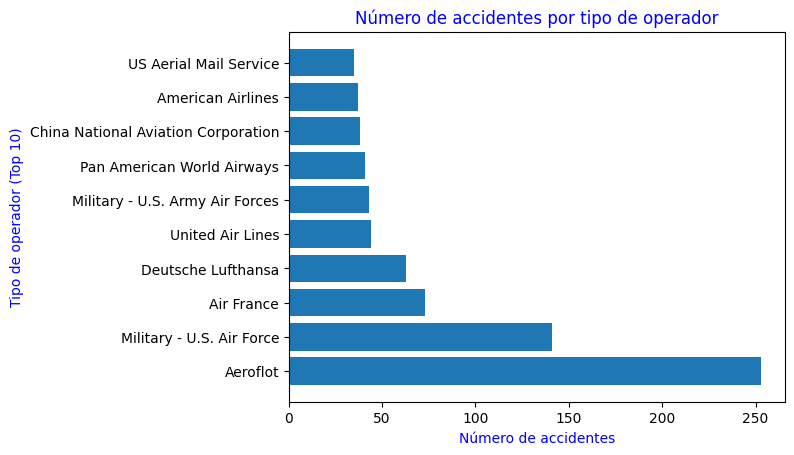

In [111]:
top_10_categorias = accidentes_por_operator.sort_values(ascending=False).head(10)  # Selecciona las 10 categorías principales
plt.barh(top_10_categorias.index, top_10_categorias.values)  
plt.xlabel('Número de accidentes', color='blue')
plt.ylabel('Tipo de operador (Top 10)', color='blue')
plt.title('Número de accidentes por tipo de operador', color='blue')
plt.show()

Aquí observamos que 'Aeroflo't  es el operador que mayor cantidad de accidentes presentó seguido por 'Military-U.S. Air Forse'.

In [112]:
accidentes_por_route = df['route'].value_counts().sort_values(ascending=False).head(10)  # Calcula el número de accidentes por tipo de ruta
print('Accidentes por tipo de ruta: ')
print(accidentes_por_route)

Accidentes por tipo de ruta: 
No route                      748
Training                       96
Sightseeing                    31
Test flight                    23
Sao Paulo - Rio de Janeiro      7
Test                            6
Rio de Janeiro - Sao Paulo      5
Croydon - Paris                 4
Bogota - Barranquilla           4
Tallinn - Helsinki              4
Name: route, dtype: int64


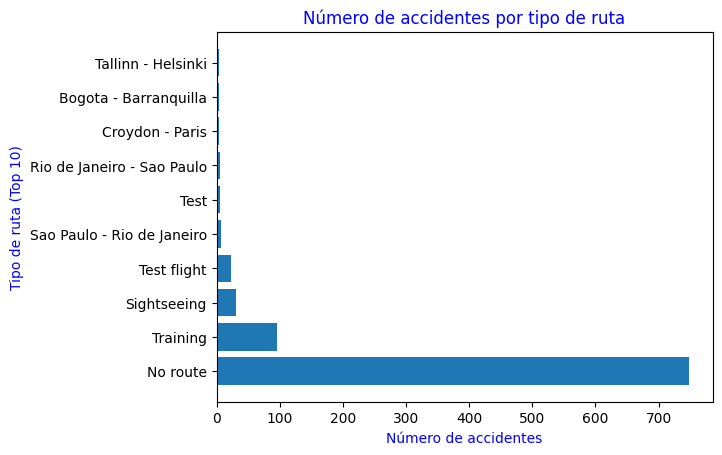

In [113]:
top_10_categorias = accidentes_por_route.sort_values(ascending=False).head(10)  # Selecciona las 10 categorías principales
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel('Número de accidentes', color='blue')
plt.ylabel('Tipo de ruta (Top 10)', color='blue')
plt.title('Número de accidentes por tipo de ruta', color='blue')
plt.show()

En este diagrama de barras observamos que una considerable mayor cantidad de accidentes la tienen aviones para los cuales no se le registó la ruta, ¿Qué podría estar indicándonos esto? También observamos que le siguen en cantidad de accidentes, los vuelos de entrenamiento, los vuelos de paseo y los vuelos de prueba.

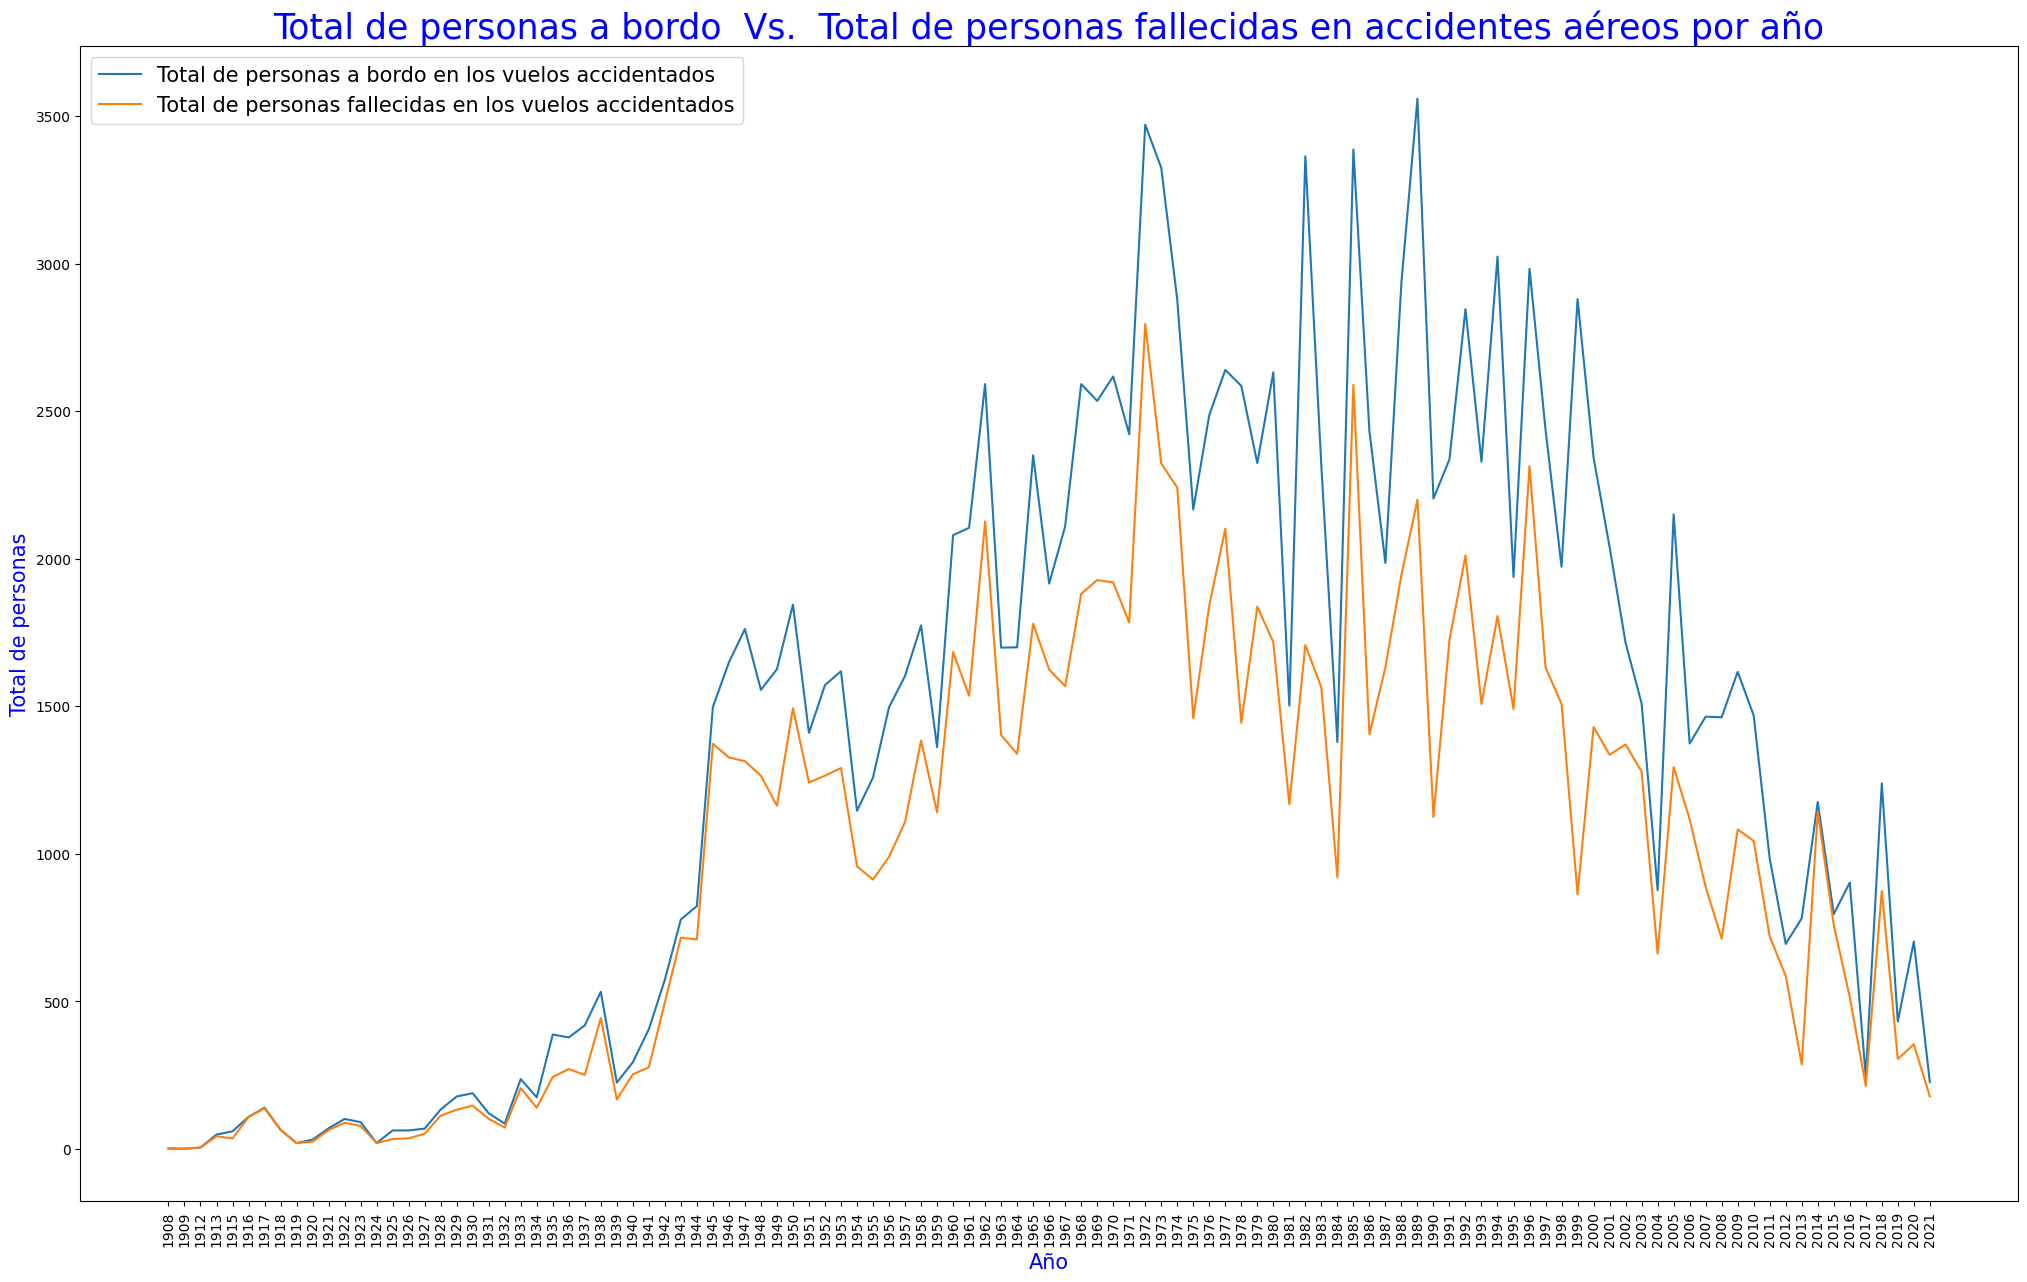

In [114]:
plt.figure(figsize=(25,15))
total_all_aboard_por_year = df.groupby('year')['all_aboard'].sum()  # Calcula el total de personas a bordo por año
total_fatalities_por_year = df.groupby('year')['fatalities'].sum()  # Calcula el total de personas muertas por año
plt.plot(total_all_aboard_por_year.index, total_all_aboard_por_year.values, label='Total de personas a bordo en los vuelos accidentados')
plt.plot(total_fatalities_por_year.index, total_fatalities_por_year.values, label='Total de personas fallecidas en los vuelos accidentados')
plt.xticks(rotation='vertical')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('Total de personas', fontsize=15, color='blue')
plt.title('Total de personas a bordo  Vs.  Total de personas fallecidas en accidentes aéreos por año', fontsize=25, color='blue')
plt.legend(fontsize=15)
plt.show()

Este diagrama de líneas nos muestra la relación entre el número de personas a bordo y el número de personas fallecidas en el accidente, indicándonos también que la seguridad ha mejorado un poco con el transcurso del tiempo, sobre todo a partir de 1945.

In [115]:
tasa_de_mortalidad = (df['fatalities'].sum()/df['all_aboard'].sum())*100
tasa_de_mortalidad

71.7181927043766

In [116]:
tasa_de_mortalidad = (total_fatalities_por_year / total_all_aboard_por_year)*100
tasa_de_mortalidad

year
1908     50.000000
1909    100.000000
1912    100.000000
1913     87.755102
1915     60.000000
           ...    
2017     87.346939
2018     70.540759
2019     70.601852
2020     50.497866
2021     78.414097
Length: 111, dtype: float64

In [117]:
indice_de_supervivencia = ((df['all_aboard'].sum() - df['fatalities'].sum())/df['all_aboard'].sum())*100
indice_de_supervivencia

28.281807295623402

In [118]:
indice_de_supervivencia = ((total_all_aboard_por_year - total_fatalities_por_year) / total_all_aboard_por_year)*100
indice_de_supervivencia

year
1908    50.000000
1909     0.000000
1912     0.000000
1913    12.244898
1915    40.000000
          ...    
2017    12.653061
2018    29.459241
2019    29.398148
2020    49.502134
2021    21.585903
Length: 111, dtype: float64

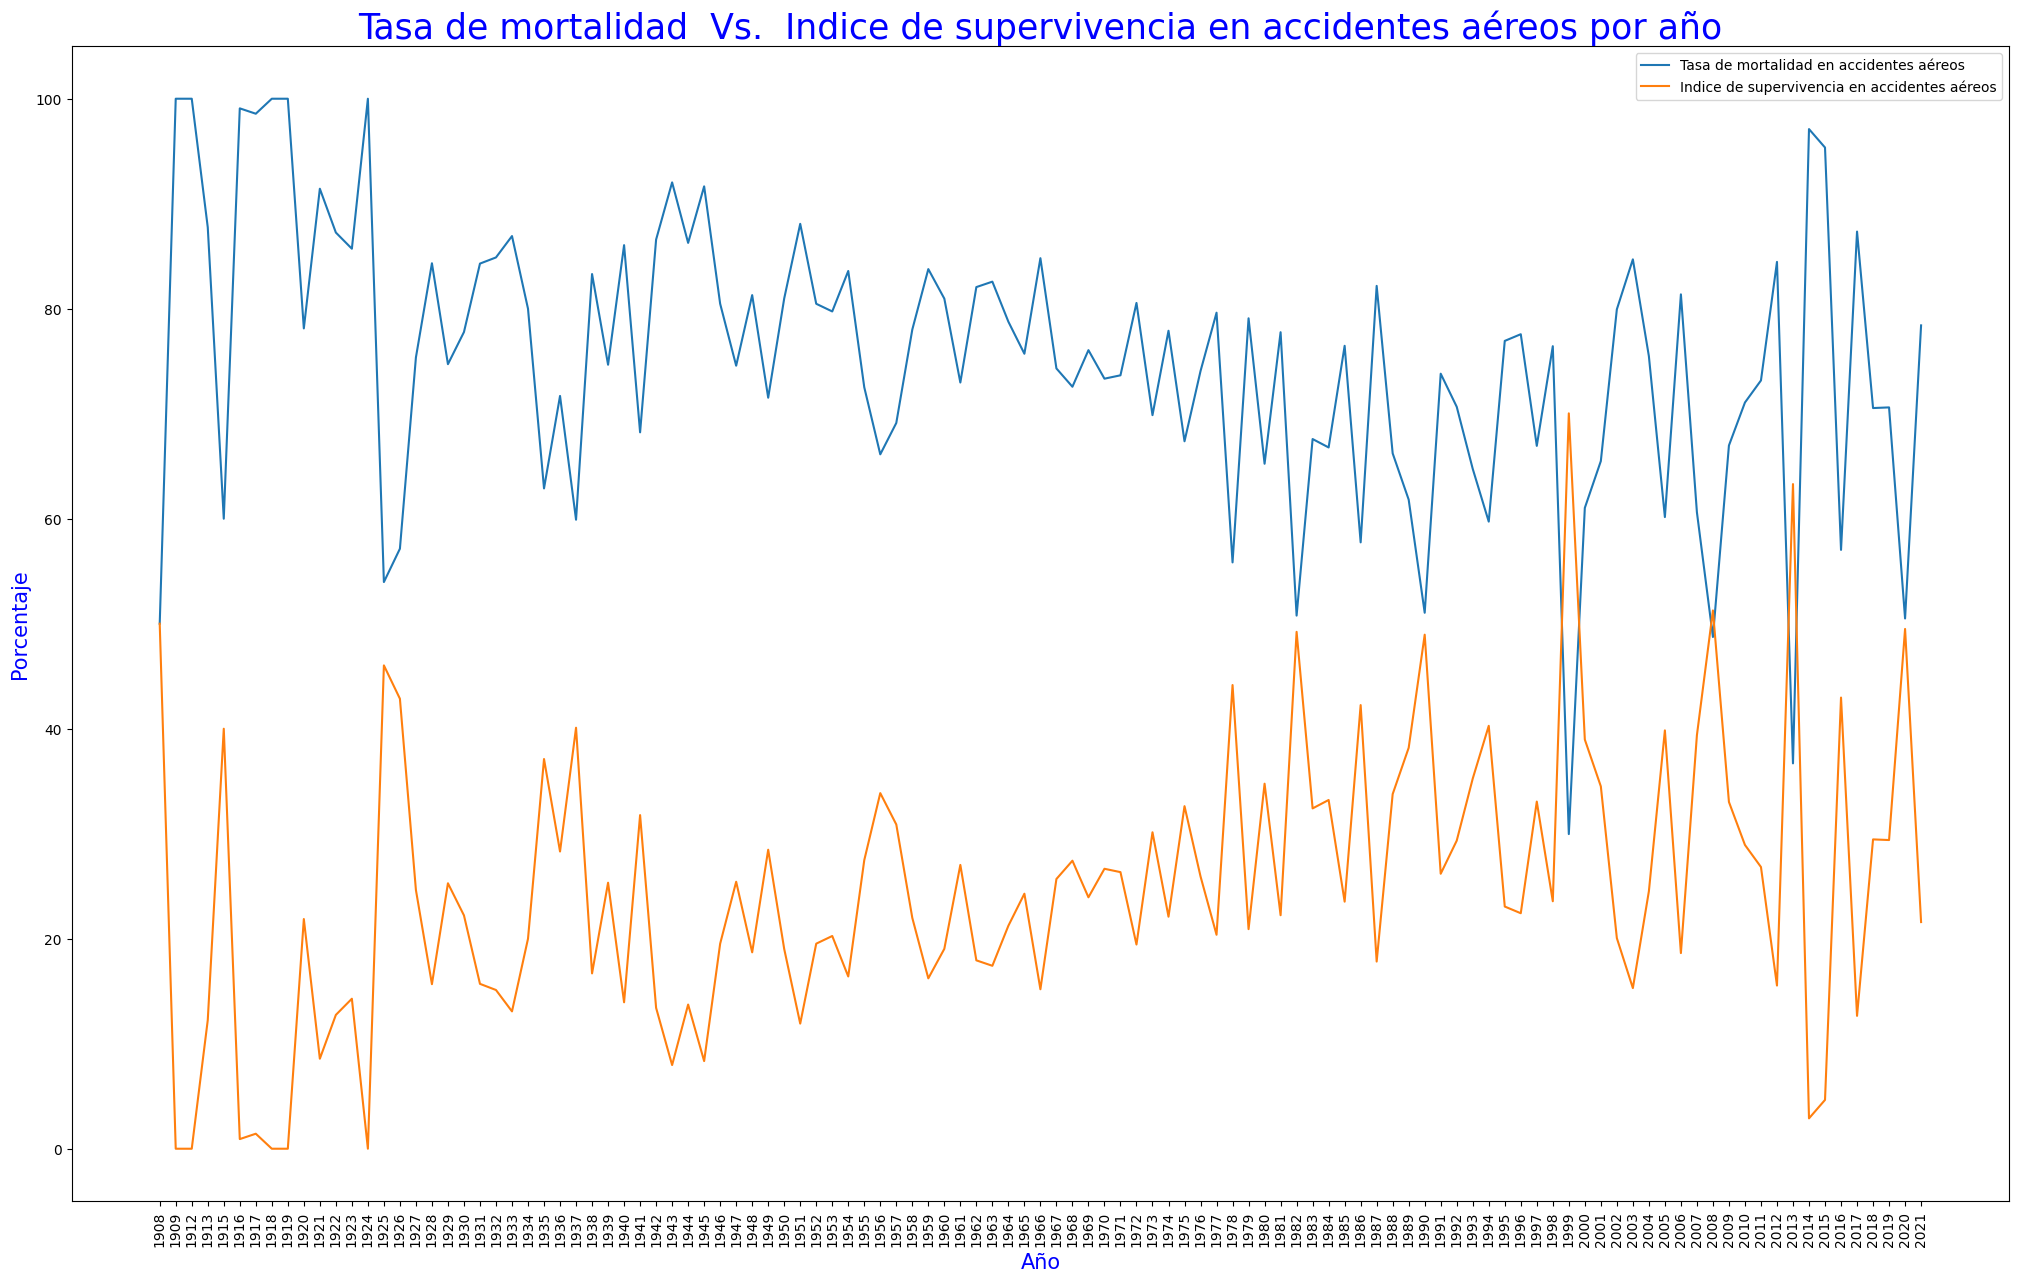

In [119]:
plt.figure(figsize=(25,15))
plt.plot(tasa_de_mortalidad.index, tasa_de_mortalidad.values, label='Tasa de mortalidad en accidentes aéreos')
plt.plot(indice_de_supervivencia.index, indice_de_supervivencia.values, label='Indice de supervivencia en accidentes aéreos')
plt.xticks(rotation='vertical')
plt.xlabel('Año', fontsize=15, color='blue')
plt.ylabel('Porcentaje', fontsize=15, color='blue')
plt.title('Tasa de mortalidad  Vs.  Indice de supervivencia en accidentes aéreos por año', fontsize=25, color='blue')
plt.legend()

Aquí observamos como se comportan la tasa de mortalidad y el índice de supervivencia a través de los años

In [120]:
# Agrupa los datos por año y operador, y cuenta la cantidad de accidentes en cada combinación
accidentes_por_operador = df.groupby(['year', 'operator']).size().reset_index(name='Accidentes')
# Agrupa nuevamente los datos solo por año y calcula la suma total de accidentes por año
total_accidentes_por_año = accidentes_por_operador.groupby('year')['Accidentes'].sum().reset_index(name='Total Accidentes')
# Fusiona los DataFrames accidentes_por_operador y total_accidentes_por_año utilizando la columna "Año" como clave de unión
accidentalidad_operador_df = pd.merge(accidentes_por_operador, total_accidentes_por_año, on='year')
# Calcula la tasa de accidentalidad dividiendo el número de accidentes por operador en cada año por el total de accidentes en ese año
accidentalidad_operador_df['Tasa de accidentalidad del operador'] = (accidentalidad_operador_df['Accidentes'] / accidentalidad_operador_df['Total Accidentes'])*100
accidentalidad_operador_df

,year,operator,Accidentes,Total Accidentes,Tasa de accidentalidad del operador
0,1908,Military - U.S. Army,1,1,100.000000
1,1909,No operator,1,1,100.000000
2,1912,Military - U.S. Navy,1,1,100.000000
3,1913,Military - German Navy,2,3,66.666667
4,1913,Private,1,3,33.333333
...,...,...,...,...,...
4101,2021,Military - Nigerian Air Force,1,7,14.285714
4102,2021,Military - Philippine Air Force,1,7,14.285714
4103,2021,Soloy Helicopters,1,7,14.285714
4104,2021,South Sudan Supreme Airlines,1,7,14.285714


In [121]:
# Agrupa los datos por año y ruta, y cuenta la cantidad de accidentes en cada combinación
accidentes_por_ruta = df.groupby(['year', 'route']).size().reset_index(name='Accidentes')
# Agrupa nuevamente los datos solo por año y calcula la suma total de accidentes por año
total_accidentes_por_año = accidentes_por_ruta.groupby('year')['Accidentes'].sum().reset_index(name='Total Accidentes')
# Fusiona los DataFrames accidentes_por_ruta y total_accidentes_por_año utilizando la columna "Año" como clave de unión
accidentalidad_ruta_df = pd.merge(accidentes_por_ruta, total_accidentes_por_año, on='year')
# Calcula la tasa de accidentalidad dividiendo el número de accidentes por ruta en cada año por el total de accidentes en ese año
accidentalidad_ruta_df['Tasa de accidentalidad de la ruta'] = (accidentalidad_ruta_df['Accidentes'] / accidentalidad_ruta_df['Total Accidentes'])*100
accidentalidad_ruta_df

,year,route,Accidentes,Total Accidentes,Tasa de accidentalidad de la ruta
0,1908,Demonstration,1,1,100.000000
1,1909,Air show,1,1,100.000000
2,1912,Test flight,1,1,100.000000
3,1913,No route,3,3,100.000000
4,1915,No route,2,2,100.000000
...,...,...,...,...,...
4259,2021,Naypyidaw - Anisakan,1,7,14.285714
4260,2021,No route,1,7,14.285714
4261,2021,Petropavlovsk - Palana,1,7,14.285714
4262,2021,Pieri - Yuai,1,7,14.285714


In [122]:
# Agrupa los datos por año y tipo de aeronave, y cuenta la cantidad de accidentes en cada combinación
accidentes_por_tipo_aeronave = df.groupby(['year', 'ac_type']).size().reset_index(name='Accidentes')
# Agrupa nuevamente los datos solo por año y calcula la suma total de accidentes por año
total_accidentes_por_año = accidentes_por_tipo_aeronave.groupby('year')['Accidentes'].sum().reset_index(name='Total Accidentes')
# Fusiona los DataFrames accidentes_por_tipo_aeronave y total_accidentes_por_año utilizando la columna "Año" como clave de unión
accidentalidad_tipo_aeronave_df = pd.merge(accidentes_por_tipo_aeronave, total_accidentes_por_año, on='year')
# Calcula la tasa de accidentalidad dividiendo el número de accidentes por tipo de aeronave en cada año por el total de accidentes en ese año
accidentalidad_tipo_aeronave_df['Tasa de accidentalidad del tipo de aeronave'] = (accidentalidad_tipo_aeronave_df['Accidentes'] / accidentalidad_tipo_aeronave_df['Total Accidentes'])*100
accidentalidad_tipo_aeronave_df

,year,ac_type,Accidentes,Total Accidentes,Tasa de accidentalidad del tipo de aeronave
0,1908,Wright Flyer III,1,1,100.000000
1,1909,Wright Byplane,1,1,100.000000
2,1912,Dirigible,1,1,100.000000
3,1913,Curtiss seaplane,1,3,33.333333
4,1913,Zeppelin L-1 (airship),1,3,33.333333
...,...,...,...,...,...
4169,2021,Beechcraft B300 King Air 350i,1,7,14.285714
4170,2021,Boeing 737-524,1,7,14.285714
4171,2021,Eurocopter AS350B3 Ecureuil,1,7,14.285714
4172,2021,Let L-410UVP-E,1,7,14.285714


In [123]:
accidentes_por_accident_place = df['accident_place'].value_counts().sort_values(ascending=False).head(15)  # Calcula el número de accidentes por tipo de ruta
print('Accidentes por lugar del accidente: ')
print(accidentes_por_accident_place)

Accidentes por lugar del accidente: 
Moscow, Russia            16
Manila, Philippines       15
New York, New York        14
Cairo, Egypt              13
Sao Paulo, Brazil         13
Rio de Janeiro, Brazil    12
Bogota, Colombia          12
Near Moscow, Russia       11
Chicago, Illinois         10
Tehran, Iran              10
London, England            8
Ankara, Turkey             8
Denver, Colorado           8
Rome, Italy                8
Burbank, California        7
Name: accident_place, dtype: int64


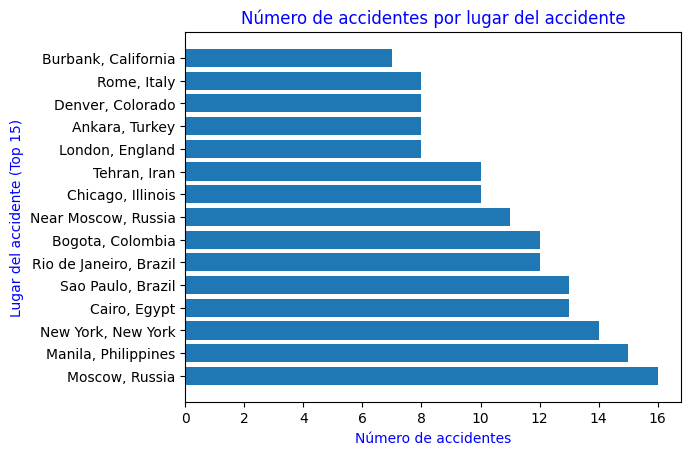

In [124]:
top_15_categorias = accidentes_por_accident_place.sort_values(ascending=False).head(15)  # Selecciona las 15 categorías principales
plt.barh(top_15_categorias.index, top_15_categorias.values)
plt.xlabel('Número de accidentes', color='blue')
plt.ylabel('Lugar del accidente (Top 15)', color='blue')
plt.title('Número de accidentes por lugar del accidente', color='blue')
plt.show()

Observamos aquí que Moscow, Manila y New York son los lugares con mayor cantidad de accidentes aéreos; seguidos por Cairo, Sao Paulo, Rio de Janeiro, Bogotá, Near Moscow, Chicago y Teherán; continuando con London, Ankara, Denver, Rome y Burbank.

In [125]:
print(df.shape)  # Dimensión del DataFrame: 4991 filas y 18 columnas

(4991, 18)


In [126]:
df.to_csv("data_AccidentesAviones.csv", index = False)